<a href="https://colab.research.google.com/github/dreamtx01/NCAA-Men-Basketball/blob/master/Capstone_1_Milestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# NCAA Men's Basketball Milestone Report 









              





# Abstract

From 1985-2019,  teams in the regular season  of NCAA Division 1 Men's  basketball games won 92,732 of their home games but only won  47,547 of their away games, and 15,805 of matches played in neutral locations.  This home court advantage is further confirmed with a Tukey HSD test, where the statistically significant difference between the pairs home and away games, the pairs home and neutral games, versus the pair away and neutral games was calculated.
Many articles have explained that the reason for a team’s home-court success is the presence of fans and the arena, as opposed to the fact that they are simply the better team in a particular matchup. Assuming fans are the reasons for this home court advantage, the odds are already stacked against a visiting team, when playing these basketball matches. This report tries to analyse  some of the differences between playing on the road and playing at home and sees how to optimize the in game statistics for the visiting team.
In this report, evaluation of the in game statistics was done from matches played during the year 2005-2019. The in-game statistics showed that the average points posted for the winning team when playing at home was about three points higher than when playing away or at a neutral location; the average three-pointers scored by the winning team was  similar when playing at home versus when playing away even though there was a general trend in increasing three-pointers scored from season season to season, and the turnover conceded by the winning team was 0.5 points higher when playing at away matches than when playing at home or at a neutral location.
In game analysis of the data also showed strong positive correlations between the field goals made and assists for the winning teams,  while there were weak correlations between turnovers conceded to the winning team to the score made by the winning team.
A comparison of the teams with the highest winning percentages in the seasons 1985 -2019 and from  2003 -2019 were made. The reason for this is that the in game statistics was only available for seasons 2003 -2019. In these comparisons, Kansas and Duke had the highest winning percentages for the seasons 1985- 2019, while Gonzaga and Kansas had the highest winning percentages for the years 2013-2019. 
These results showed that Gonzaga must have improved a lot from the year 2003-2019, Duke might have dropped in form during this period, while Kansas maintained their consistency during both time periods of comparison.
Based on this information a comparison was made between the average winning scores in matches for Kansas and Gonzaga. The results showed that the average winning scores when these teams play their opponents was not statistically significant. The average winning score is 75 points in matches won by both teams.



 --- 
__Table of Contents__

[Abstract](#abstract)

[Introduction](#introduction)

[Objective](#objective)

[Dataset](#dataset)	

[Data Type](#DataType)

[Data Cleaning & Wrangling](#datacleaning&wrangling)

[Handling Missing Data](#HandlingMissingData)

[Exploratory Data Analysis](#exploratoryDataAnalysis)

[Data Statistics](#datastatistics)

---
# Introduction

The phenomenon of home field advantage is nothing new in the world of sports .  Home teams generally have the advantage of having the support of larger, more enthusiastic crowds, and it has been suggested in some studies, that it is the home court atmosphere  that enhances the home teams opportunities for winning matches.

---

# Objective

The goal of my project is to study game factors that affect a home team winning an NCAA Division 1 Men’s basketball game, and likewise affect an away team losing a match. The information derived from these analysis can help a basketball coach tune his game play tactics and thereby increase his odds of winning a game when playing at an away location.

---

# Dataset 

The dataset for this analysis will be obtained  from Kaggle [Dataset](https://www.kaggle.com/c/mens-machine-learning-competition-2019/data "Dataset").This data is associated with an annual competition sponsored by Google.The datasets explored in our analysis were from the tables


---
* RegularSeasonDetailedResults.csv 
> _The regular season detailed results file identifies the game by game match play data and results for regular season matches for the years 2003 - 2019. The dataset for the regular detailed season games consists of 87,366 data points for 350 college basketball teams playing in the NCAA since 2002. This dataset includes 34 variables such as number of assists, three-point percentages per game, win and loss records per season, location of matches played._

* RegularSeasonCompactResults.csv 
>_The regular season compact results identifies just the team losses and wins from 1985-2016. The dataset for the regular season compact games consists of 156,089 entries and 8 variables. These variables do not include in-game data._


* TeamSpellings.csv 
>_The teamspellings file is used to correlate TeamID numbers with their associated names_. 



In [1]:

# Code 1: Dataset
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway,ttest_ind,ttest_1samp, stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd



from IPython import display
%matplotlib inline

import matplotlib.pyplot as plt
from collections import Counter

from IPython import display
from ipywidgets import interact, widgets

from google.colab import files
uploaded =files.upload()

import io
capstone2= pd.read_csv(io.BytesIO(uploaded["RegularSeasonCompactResults.csv"]))

uploaded =files.upload()
import io
capstone= pd.read_csv(io.BytesIO(uploaded["RegularSeasonDetailedResults.csv"]))

uploaded =files.upload()
import io
cap= pd.read_csv(io.BytesIO(uploaded["TeamSpellings.csv"]),encoding ="latin")










/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving RegularSeasonCompactResults.csv to RegularSeasonCompactResults (1).csv


Saving RegularSeasonDetailedResults.csv to RegularSeasonDetailedResults (1).csv


Saving TeamSpellings.csv to TeamSpellings (1).csv


In [2]:
capstone.shape


(82041, 34)

A summary of the variables in the dataset is provided in the table below, with the designation that a column that begins with "W" or "L" refers to the winning or losing team:

In [3]:
capstone.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [4]:
capstone2.shape

(156089, 8)

In [5]:
capstone2.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


*Nomenclature*
WTeamID - this identifies the id number of the team that won the game.

WScore - this identifies the number of points scored by the winning team.

LTeamID - this identifies the id number of the team that lost the game.

LScore - this identifies the number of points scored by the losing team. 

WLoc - this identifies the "location" of the winning team. The home team is given the value”H”, while the visiting
team is given the value “A”, and the value “N” is given to a match played on a neutral location. 

NumOT - this indicates the number of overtime periods in the game, an integer 0 or higher.

WFGA - field goals attempted (by the winning team)

WFGM3 - three pointers made (by the winning team)

WFGA3 - three pointers attempted (by the winning team)

WFTM - free throws made (by the winning team)

WFTA - free throws attempted (by the winning team)

WOR - offensive rebounds (pulled by the winning team)

WDR - defensive rebounds (pulled by the winning team)

WAst - assists (by the winning team)

WTO - turnovers committed (by the winning team)

WStl - steals (accomplished by the winning team)

WBlk - blocks (accomplished by the winning team)

WPF - personal fouls committed (by the winning team)

# Data Cleaning & Wrangling
Before beginning analysis of the data, it is essential to explore there is no missing data value in our dataset. It is also essential that all data in our table was of the correct data type. This upfront work will give more confidence in interrogating the data and would allow better conclusions to be made as regards the dataset. The libraries used for the data cleaning and wrangling of the data sets are: 

1. numpy for scientific computing of the numerical arrays 

2. pandas for data analysis and manipulation , 

3. matplotlib for visualization.

# Data Type
The next step in the data wrangling stage was to determine the type of data type in the dataset. As can be observed in the table below, there are 87,366 entries, with no missing values in any of the 34 columns. Additionally, all but one column takes integer values , whereas the lone column (WLoc) takes a string entry.

In [6]:

capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82041 entries, 0 to 82040
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   82041 non-null  int64 
 1   DayNum   82041 non-null  int64 
 2   WTeamID  82041 non-null  int64 
 3   WScore   82041 non-null  int64 
 4   LTeamID  82041 non-null  int64 
 5   LScore   82041 non-null  int64 
 6   WLoc     82041 non-null  object
 7   NumOT    82041 non-null  int64 
 8   WFGM     82041 non-null  int64 
 9   WFGA     82041 non-null  int64 
 10  WFGM3    82041 non-null  int64 
 11  WFGA3    82041 non-null  int64 
 12  WFTM     82041 non-null  int64 
 13  WFTA     82041 non-null  int64 
 14  WOR      82041 non-null  int64 
 15  WDR      82041 non-null  int64 
 16  WAst     82041 non-null  int64 
 17  WTO      82041 non-null  int64 
 18  WStl     82041 non-null  int64 
 19  WBlk     82041 non-null  int64 
 20  WPF      82041 non-null  int64 
 21  LFGM     82041 non-null  int64 
 22

In fact from the data set description we know that the WLoc column will take only three values each one representing the location of games played. To confirm the entry of the WLoc column we call the unique () function on that column.



In [7]:

capstone.describe(include='all')
capstone.WLoc.unique()

array(['N', 'H', 'A'], dtype=object)

* H stands for Home game
* A stands for away (visiting to opponent’s site)
* N is the location of games played at a neutral location


# Handling Missing Data
The next step in the data wrangling stage is to check for any gaps in the dataset. This is confirmed with the function  “is null” and “value_counts”. The isnull function finds the null value in the data set, while the value_counts function displays the amount of the categorical variables in WLoc.   


In [8]:

capstone.isnull().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [9]:
capstone.WLoc.value_counts(dropna=False)

H    48684
A    25046
N     8311
Name: WLoc, dtype: int64

Based on these results, we can observe that there are no **missing values** in the dataset.
 It should be noted that if there were missing values in the column we would either drop them or fill them in. This is because some of the techniques in the data exploratory will not allow for missing data.


# Exploratory Data Analysis

Following the data wrangling of the data, the next step is to interrogate the dataset and ask a series of questions of the dataset. These questions will help identify the contributing factors affecting home games winning matches. The questions being asked of the data are :

* Does a winning team score more points when playing at home, than when playing at either a neutral ground or an away ground?
* Does a losing team score more points when playing at home, than when playing at either a neutral ground or an away ground?
* What is the difference in amount of matches a team wins either home, away or at a neutral location?
* What is the average variation in points scored for the winning team per season?
* What is the average variation in three-points scored by the winning team when playing at home, away or a neutral location per season?
* What is the average turnover by the winning team when playing at home, away or a neutral location per season?
* What is the ranking of the top 15 teams based on the winning percentage per season for seasons 2002-2019?
* What is the ranking of the top 15 teams based on the winning percentage per season for seasons 1985-2019?


__1.Does a winning team score more points when playing at home, than when playing at either a neutral ground or an away ground?__

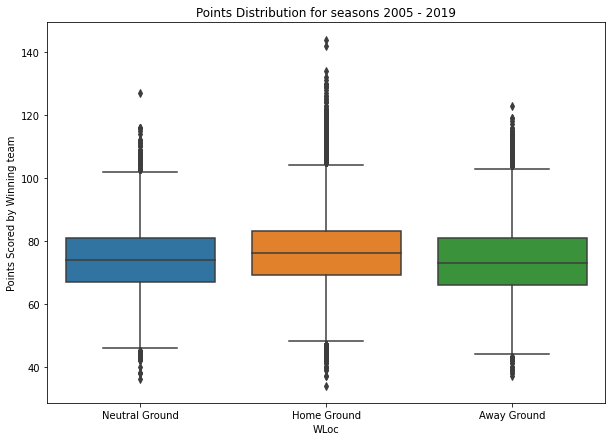

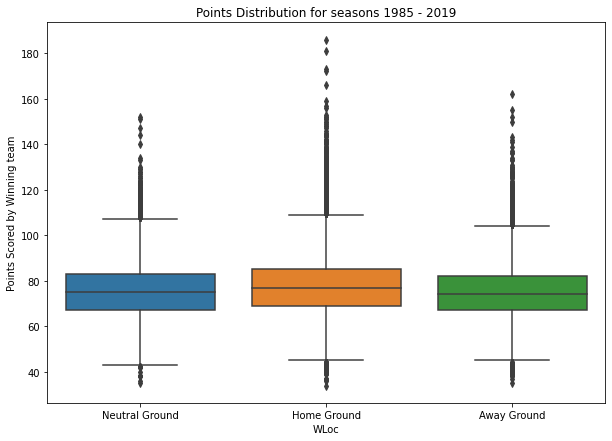

In [10]:
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)
capstone_plot= sns.boxplot(data = capstone, x= 'WLoc',y ='WScore')
ax1.set_title("Points Distribution for seasons 2005 - 2019")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Points Scored by Winning team')
plt.show()

fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)
capstone_plot= sns.boxplot(data = capstone2, x= 'WLoc',y ='WScore')
ax1.set_title("Points Distribution for seasons 1985 - 2019")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Points Scored by Winning team')
plt.show()


The box plots show that the average number of points for the winning team at their home ground is higher than the points scored when playing at either away or neutral grounds. This result will be further investigated in the statistical portion of the report. This box plot confirms the phenomenon of home advantage being present for home teams.

__2.Does a losing team score more points when playing at home than when playing at either a neutral ground or an away ground?__

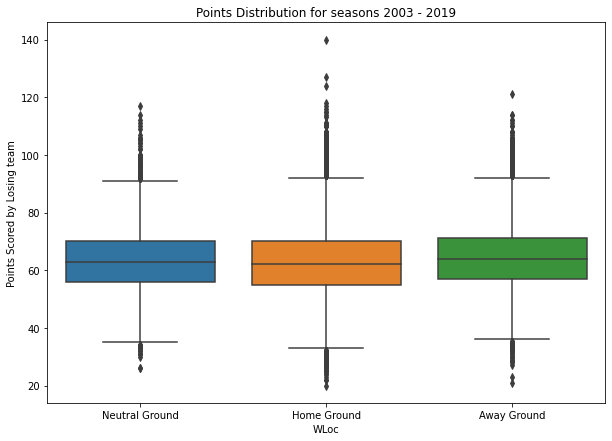

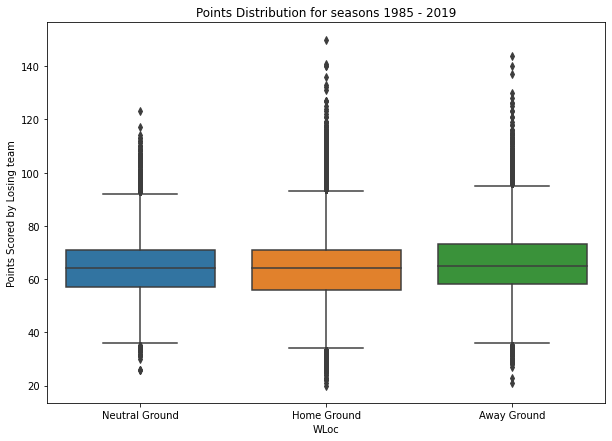

In [11]:
# Code 9: Box Plot - points scored by losing team at playing locations
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)

capstone_plot= sns.boxplot(data = capstone, x= 'WLoc',y ='LScore')

ax1.set_title("Points Distribution for seasons 2003 - 2019")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Points Scored by Losing team')
plt.show()

fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)

capstone_plot= sns.boxplot(data = capstone2, x= 'WLoc',y ='LScore')

ax1.set_title("Points Distribution for seasons 1985 - 2019")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Points Scored by Losing team')
plt.show()

The plots seem to show that the losing teams score more points when playing at an away ground versus when playing at their neutral or home ground. However, there seems to be no difference to the average number of points scored by the losing team when playing in either of the neutral or home locations.



__3.What is the difference in amount of matches a team wins either home, away or at a neutral location?__

In [12]:
pd.DataFrame(capstone.WLoc.value_counts())

,WLoc
H,48684
A,25046
N,8311


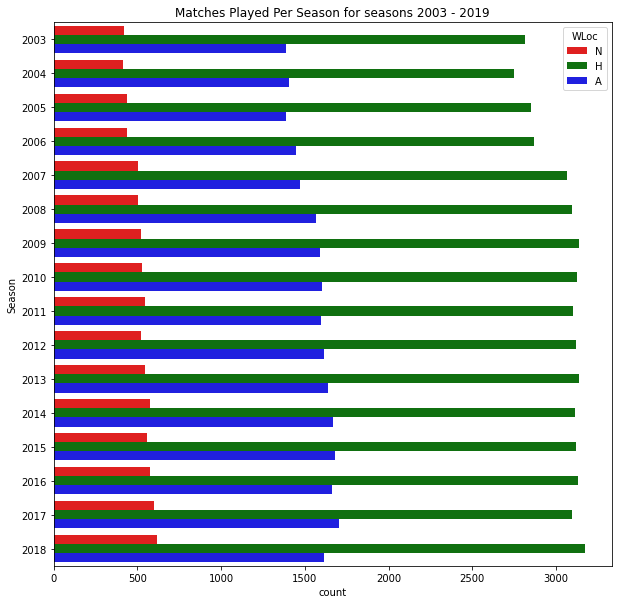

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y = capstone["Season"],hue=capstone["WLoc"],
              palette=["r","g","b","c","lime","m","y","k","gold","orange"])
plt.title("Matches Played Per Season for seasons 2003 - 2019")
plt.show()


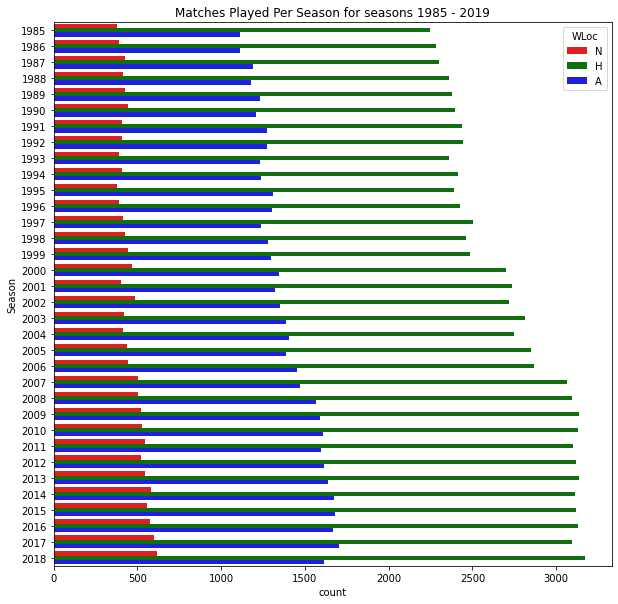

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(y = capstone2["Season"],hue=capstone2["WLoc"],
              palette=["r","g","b","c","lime","m","y","k","gold","orange"])
plt.title("Matches Played Per Season for seasons 1985 - 2019")
plt.show()


The proportion of all games won at home, away and in a neutral ground were all similar across all seasons.The graphs also show that more matches were played at home than at away and neutral locations in a given season.



__4.What is the average variation in points scored for the winning team per season?__

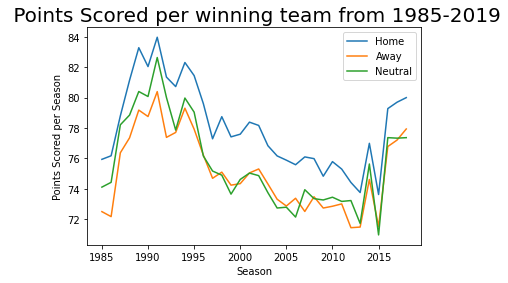

In [15]:
Home = capstone2[capstone2.WLoc == 'H']
Away = capstone2[capstone2.WLoc == 'A']
Neutral = capstone2[capstone2.WLoc == 'N']
AvgH=Home.groupby("Season").WScore.mean()

AvgA=Away.groupby("Season").WScore.mean()

AvgN=Neutral.groupby("Season").WScore.mean()

A=plt.plot(AvgH.index,AvgH)
B=plt.plot(AvgA.index,AvgA)
C=plt.plot(AvgN.index,AvgN)

plt.xlabel('Season')
plt.ylabel('Points Scored per Season')
plt.title(' Points Scored per winning team from 1985-2019', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

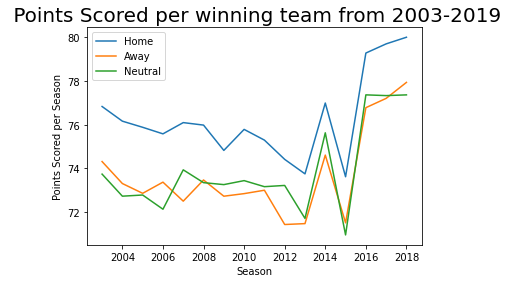

In [16]:
Home = capstone[capstone.WLoc == 'H']
Away = capstone[capstone.WLoc == 'A']
Neutral = capstone[capstone.WLoc == 'N']
AvgH=Home.groupby("Season").WScore.mean()

AvgA=Away.groupby("Season").WScore.mean()

AvgN=Neutral.groupby("Season").WScore.mean()

A=plt.plot(AvgH.index,AvgH)
B=plt.plot(AvgA.index,AvgA)
C=plt.plot(AvgN.index,AvgN)

plt.xlabel('Season')
plt.ylabel('Points Scored per Season')
plt.title(' Points Scored per winning team from 2003-2019', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

For all seasons the number of points scored by the winning team while playing at home is greater than points scored when playing at an away or a neutral location.  The data also shows that from 2015 there is a general upward trend in the points scored per season. Some suggestions for the uptick in scoring are that maybe teams are becoming more efficient in scoring, or it could also be that the rules of basketball have changed to favor the scoring team. Another observation from this analysis is that in 2015 there was a dip in scoring in all locations. This observation would require further investigation as to why there was a specific drop in scoring this particular year.


__5.What is the average variation in three-pointers scored by the winning team when playing at home, away or a neutral location per season?__

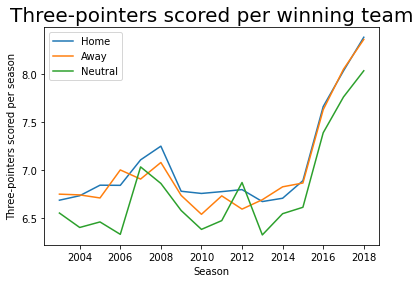

In [17]:
#Code 12: Line Chart - Three-Pointers scored per winning team per season
AvgH3=Home.groupby("Season").WFGM3.mean()

AvgA3=Away.groupby("Season").WFGM3.mean()

AvgN3=Neutral.groupby("Season").WFGM3.mean()

A=plt.plot(AvgH3.index,AvgH3)
B=plt.plot(AvgA3.index,AvgA3)
C=plt.plot(AvgN3.index,AvgN3)

plt.xlabel('Season')
plt.ylabel('Three-pointers scored per season')
plt.title('Three-pointers scored per winning team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()


There seems to be a general upward trend in three pointers scored as the years go by.It can also be observed for most seasons the number of three-pointers scored by the winning team while playing at home is greater than three-pointers scored when playing at an away, or a neutral location. Some of the reasons  for this general increase in three-pointers could be the game of basketball is evolving to more teams scoring more three pointers.


__6.What is the average amount of  turnovers per season?__

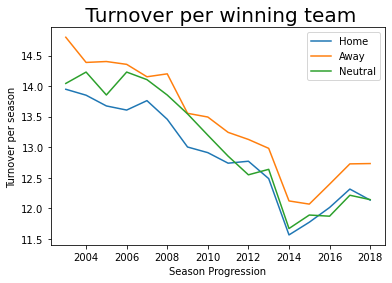

In [18]:
AvgHTO=Home.groupby("Season").WTO.mean()

AvgATO=Away.groupby("Season").WTO.mean()

AvgNTO=Neutral.groupby("Season").WTO.mean()

ATO=plt.plot(AvgHTO.index,AvgHTO)
BTO=plt.plot(AvgATO.index,AvgATO)
CTO=plt.plot(AvgNTO.index,AvgNTO)


plt.xlabel('Season Progression')
plt.ylabel('Turnover per season')
plt.title(' Turnover per winning team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

For all seasons the number of turnovers conceded while playing at an away location for the winning team is greater than turnovers conceded when playing at an home or a neutral location. There also seems to be a decrease in number of turnovers through the years.

__7.What is the ranking of the top 15 teams based on the winning percentage per season? Winning Percentage is defined as (matches won/total matches played *100) from 2012-2019__

In [19]:
# Matches Played by Teams
# The first thing to do is to associate TeamID to the name of the team. 
#This will help us put a name to the team
dic = {}
for i in range(0,len(cap["TeamID"])):
    dic[cap["TeamID"][i]]=cap['TeamNameSpelling'][i]
capstone["WTeamName"]=[dic[teamid] for teamid in capstone['WTeamID']]
capstone["LTeamName"]=[dic[teamid] for teamid in capstone['LTeamID']]
w=pd.DataFrame(capstone["WTeamName"].value_counts())
l=pd.DataFrame(capstone["LTeamName"].value_counts())
Winning_teams = w.rename(columns={"WTeamName":"Matches Played"})
Winning_teams[:15]

,Matches Played
kansas,429
duke,427
gonzaga,423
kentucky,407
unc,391
memphis,390
louisville,383
arizona,382
wisconsin,374
florida,374


In [0]:
pc_dict={team:w.loc[team][0]/(l.loc[team][0]+w.loc[team][0]) * 100 for team in w.index}

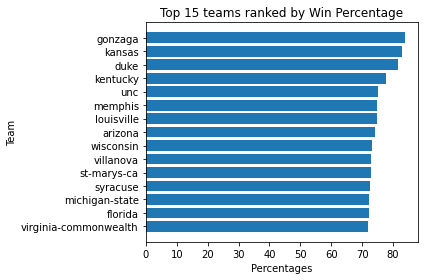

In [21]:
pc_dict_counter =Counter(pc_dict)
team=[]
percentage=[]
for item in pc_dict_counter.most_common(15):
    team.append(item[0])
    percentage.append(item[1])

team.reverse()
percentage.reverse()
plt.barh(team,percentage)
plt.title("Top 15 teams ranked by Win Percentage")
plt.ylabel("Team")
plt.xlabel("Percentages")
plt.tight_layout()
plt.show()

The team with the highest win percentage is Gonzaga from 2012 -2019

__8.What is the ranking of the top 15 teams based on the winning percentage per season? Winning Percentage is defined as (matches won/total matches played *100) from 2012-2019__

In [22]:
# Matches Played by Teams
# The first thing to do is to associate TeamID to the name of the team. 
#This will help us put a name to the team
dic = {}
for i in range(0,len(cap["TeamID"])):
    dic[cap["TeamID"][i]]=cap['TeamNameSpelling'][i]
capstone2["WTeamName"]=[dic[teamid] for teamid in capstone2['WTeamID']]
capstone2["LTeamName"]=[dic[teamid] for teamid in capstone2['LTeamID']]
w=pd.DataFrame(capstone2["WTeamName"].value_counts())
l=pd.DataFrame(capstone2["LTeamName"].value_counts())
Winning_teams = w.rename(columns={"WTeamName":"Matches Played"})
Winning_teams[:15]

,Matches Played
duke,872
kansas,859
kentucky,818
unc,812
arizona,803
syracuse,776
memphis,732
xavier,730
louisville,726
gonzaga,725


In [0]:
pc_dict={team:w.loc[team][0]/(l.loc[team][0]+w.loc[team][0]) * 100 for team in w.index}

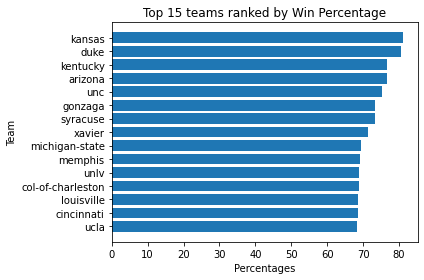

In [24]:
pc_dict_counter =Counter(pc_dict)
team=[]
percentage=[]
for item in pc_dict_counter.most_common(15):
    team.append(item[0])
    percentage.append(item[1])

team.reverse()
percentage.reverse()
plt.barh(team,percentage)
plt.title("Top 15 teams ranked by Win Percentage")
plt.ylabel("Team")
plt.xlabel("Percentages")
plt.tight_layout()
plt.show()

# Data Statistics
Upon exploration of the data and making initial observations about the  data, the next step will be to  find out whether there are any correlations within the in game statistics, and also confirm whether our initial observations were statistically significant. The questions that will be asked of the data will be:
1. Is the difference between a team winning college basketball matches at home locations statistically significant from when playing at away or a neutral location? This question will be answered with the aid of an ANOVA (Analysis of Variance) test, followed by a pairwise Tukey HSD correlation.
2. Is there a correlation between the game by game data for a winning team? A heat map analysis will be conducted on the data to find correlations between the game by game data.The correlation matrix from the heat data will show the correlations that exist between in game statistics during the season.
3. What is the 95% confidence interval for the difference between the standard deviations of the winning scores for the two top performing teams? This analysis will be done with a bootstrap sampling analysis, calculating these differences over 10000 replicates. The teams being considered will be Gonzaga and Kansas.





__1.Is the difference between a team winning college basketball matches at home locations statistically significant from when playing at away or a neutral location? This question will be answered with the aid of an ANOVA (Analysis of Variance) test, followed by a pairwise Tukey HSD correlation__.

When comparing more than three numerical datasets, the best way to preserve a Type I error probability of 0.05 is to use ANOVA. ANOVA (Analysis of Variance) tests the null hypothesis that all of the datasets have the same mean. If we reject the null hypothesis with ANOVA, we’re saying that at least one of the sets has a different mean; however, it does not tell us which datasets are different.
We can use the SciPy function f_oneway to perform ANOVA on multiple datasets of winning scores of teams playing in home, away and neutral locations. The f_oneway function takes in each dataset as a different input and returns the t-statistic and the p-value.

In [0]:
#Code 15: ANOVA test & Tukey HSD
Home=capstone.loc[lambda dfH: dfH['WLoc'] == "H", :]
Away=capstone.loc[lambda dfH: dfH['WLoc'] == "A", :]
Neutral=capstone.loc[lambda dfN: dfN['WLoc'] == "N", :]



When comparing more than two numerical datasets, the best way to preserve a Type I error probability of 0.05 is to use ANOVA. ANOVA (Analysis of Variance) tests the null hypothesis that all of the datasets have the same mean. If we reject the null hypothesis with ANOVA, we’re saying that at least one of the sets has a different mean; however, it does not tell us which datasets are different.

In [0]:
Home_Win_mean=Home["WScore"].mean
Away_Win_mean=Away["WScore"].mean
Neutral_Win_mean=Neutral["WScore"].mean

a=Home["WScore"]
b=Away["WScore"]
c=Neutral["WScore"]

We can use the SciPy function f_oneway to perform ANOVA on multiple datasets. It takes in each dataset as a different input and returns the t-statistic and the p-value.

In [27]:
from scipy.stats import f_oneway,ttest_ind,ttest_1samp, stats
fstat, pval = f_oneway(a, b, c)
print (pval)

4.602940056163357e-212


The null hypothesis, in this case, is that all three populations have the same mean score on this videogame. We will reject this null hypothesis (since we are getting a p-value less than 0.05), we are reasonably confident that a pair of datasets is significantly different. After using only ANOVA, we can’t make any conclusions on which two populations between the Home, Away and Neutral locations have a significant difference.

In [28]:
# Using our data from ANOVA, we create v and l
v = np.concatenate([a, b, c])
labels = ['a'] * len(a) + ['b'] * len(b) + ['c'] * len(c)

tukey_results= pairwise_tukeyhsd(v, labels, 0.05)

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b  -2.5265  0.001 -2.7284 -2.3247   True
     a      c   -2.253  0.001  -2.561 -1.9449   True
     b      c   0.2736 0.1247  -0.055  0.6022  False
----------------------------------------------------



H0 = all three locations have the same mean score in the basketball game 
H1 = at least one of the locations have different means  in the basketball game.

We will reject this null hypothesis  for the pairs a & b and a & c (since we are getting a p-value less than 0.05).  We are reasonably confident that a pair of datasets is statistically significantly different. After using only ANOVA, we can’t make any conclusions on which two populations between the home, away and neutral locations have a significant difference.
There is a significant difference between the pairs home and away games,and the pairs home and neutral games, but there is not a significant difference between the pair away and neutral games.


__2.Is there a correlation between the game by game data for a winning team? A heat map analysis will be conducted on the data to find correlations between the game by game data.The correlation matrix from the heat data will show the correlations that exist between in game statistics during the season.__

In order to find a correlation between variables for the winning team, a heatmap will be created. This heat map will display the r correlation and will also exclude correlations that have a p value less than 0.05

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [0]:
capstone_drop=capstone.drop(columns=["DayNum","Season","WLoc","WTeamID","LTeamID","LFGM","LFGM3","LFGA3","LFTM","LOR","LDR","LAst","LTO","LStl","LBlk","LPF","LFGA","LFTA","LScore","WTeamName","LTeamName"])

In [0]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(capstone_drop.shape[1],
                               capstone_drop.shape[1]))
    for col in df.columns:
        for col2 in capstone_drop.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(capstone_drop[col],
                                   capstone_drop[col2])
            p_matrix[capstone_drop.columns.to_list().index(col),
                     capstone_drop.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(capstone_drop)
mask = np.invert(np.tril(p_values<0.05))



In [0]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(capstone_drop.shape[1],
                               capstone_drop.shape[1]))
    for col in df.columns:
        for col2 in capstone_drop.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(capstone_drop[col],
                                   capstone_drop[col2])
            p_matrix[capstone_drop.columns.to_list().index(col),
                     capstone_drop.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(capstone_drop)
mask = np.invert(np.tril(p_values<0.05))


In [0]:
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

In [0]:

# Plotting with significance filter
corr = capstone_drop.corr() # get correlation
p_values = corr_sig(capstone_drop)   # get p-Value
mask = np.invert(np.tril(p_values<0.05))# mask - only get sigificant corrplot_cor_matrix(corr,mask)
plot_cor_matrix(corr,mask)

Orange means positive, blue means negative. The stronger the color, the larger the correlation magnitude. The heatmap was conducted for in game data for the winning team Now looking at the chart above, we can see some strong positive correlations with the winning scores. The data with these strong correlations to the winning scores are: WFGM and WFGA. Other strong positive correlations, with correlation values of 0.9 are WFTA and WFTM

The heatmap was conducted for in-game data  variables for the winning team. In the heat map displayed below orange means positive, and  blue means negative. The stronger the color, the larger the correlation magnitude. 

The heatmap represents the collinearity of the multiple variables in the dataset. The .corr() function was used in the code to show the correlation between the values. This is where we want to set our independent or target variable. Our target variable is “WScore”. This is  the number of points scored by the winning team.  We want to find out how all of the other variables affect the points scored by the winning team. In the heatmap, the dark red areas represent a positive correlation, while light blue represents a negative correlation. It is also normal that the darkest areas are a 1:1 ratio since WScore=WScore, NumOT=NumOT, etc.
While WScore is still our independent variable, we can see in the map below that there is little to no correlation between the WTO  (-0.018), though a high correlation between WFGM and WAst (0.82, 0.56). these relationships are obvious (assists in a basketball game and field goals made positively correlates with the scores in a match) 
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features. In order to decide to find which features to drop when we decide to create our machine learning model, we compare the relationship between WFGM and WAst, and we get a correlation number of (0.63). Dropping either of these variables when tuning our eventual machine model should still produce a fairly accurate prediction model.
In addition to plotting the correlation coefficients in the heat map, only significant p-value correlations (alpha < .05) were plotted. This was achieved with the def corr_sig function. It can be seen from the plot that the relationship between WFGA3 and WPF was not statistically significant. 

In [0]:
stats.pearsonr(capstone_drop["WPF"],capstone_drop["WFGA3"])

In [0]:
sns.pairplot(capstone_drop,height=1.5)

A pairs plot allows us to see both the distribution of single variables and relationships between two variables. A scan through of the pairs plot shows variables that are highly correlated with each other. The relationship between (WScore and WFGM), and (WFTA and WFTM) shows a linear correlation between these variables. This positive correlation was also confirmed with the heatmap.

__3.What is the 95% confidence interval for the difference between the standard deviations of the winning scores for the two top performing teams?This analysis will be done with a bootstrap sampling analysis, calculating these differences over 10000 replicates. The teams being considered will be Gonzaga and Kansas.__

A bootstrap method will be used to compare  the means of winning scores of two teams over multiple seasons. The two chosen are Gonzaga and Kansas. These two teams were chosen because they have the highest winning percentages i.e. winning Percentage is defined as (matches won/total matches played *100) . We will proceed by defining both the null and the alternative hypothesis for our calculations

H0: there is no difference in standard deviations in the winning scores between Kansas and Gonzaga 

Ha: there is a difference in standard deviations in the winning scores between Kansas and Gonzaga 


In [0]:
# Function derived from Data camp Statistical Thinking in Python (part 2):Generating many bootstrap replicates

""""Draw bootstrap replicates. 
    Func refers to the type of statistic we want (np.mean / np.median etc.)"""

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates =  np.empty(size)

    # Generate replicates
    for i in range(size): 
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)  
    return bs_replicates

In [0]:
# The first thing to do is to associate TeamID to the name of the team. 
#This will help us put a name to the team
dic = {}
for i in range(0,len(cap["TeamID"])):
    dic[cap["TeamID"][i]]=cap['TeamNameSpelling'][i]
capstone["WTeamName"]=[dic[teamid] for teamid in capstone['WTeamID']]
capstone["LTeamName"]=[dic[teamid] for teamid in capstone['LTeamID']]
# Creating the two subset samples of charges to Gonzaga and Kansas 
#group in arrays

kansas=np.array(capstone[capstone['WTeamName']=='kansas'].WScore)
Gonzaga=np.array(capstone[capstone['WTeamName']=='gonzaga'].WScore)

# Calculating the difference in standard deviations between 
#Gonzaga and Kansas winning scores
Gonzaga_std = np.std(Gonzaga,ddof=1)
kansas_std = np.std(kansas,ddof=1)
std_diff = Gonzaga_std - kansas_std

In [0]:
# Using boostrap to test the null hypothesis mentioned above
np.random.seed(47)

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Initializing replicates
perm_replicates = np.empty(10000)

# Generating replicates
for i in range(10000):
    perm_sample_1, perm_sample_2 = permutation_sample(Gonzaga, kansas)
    perm_replicates[i] = np.std(perm_sample_1) - np.std(perm_sample_2)

conf_int_lower = np.percentile(perm_replicates, 2.5)
conf_int_upper = np.percentile(perm_replicates, 97.5)
p = np.sum(perm_replicates >=std_diff) / len(perm_replicates)

print("Stardard Deviation: ",std_diff )
print("p-value =", p)

In [0]:
np.random.seed(47)

# Computing the difference in means
mean_diff = np.mean(Gonzaga) - np.mean(kansas)

# Concatenating the two samples
conc_mean = np.mean(np.concatenate((Gonzaga, kansas)))

# Shifting the means of both samples to match the concatenated mean
Gonz_shifted = Gonzaga + conc_mean - np.mean(Gonzaga)
kansas_shifted = kansas + conc_mean - np.mean(kansas)

# Initializing replicates 
bs_replicates = np.empty(10000)

# Generating replicates
for i in range(10000):
    Gonz_rep = np.random.choice(Gonz_shifted, size=len(Gonzaga))
    kansas_rep = np.random.choice(kansas_shifted, size=len(kansas))
    bs_replicates[i] = np.mean(Gonz_rep) - np.mean(kansas_rep)

# Computing confidence intervals
conf_int_lower1 = np.percentile(bs_replicates, 2.5)
conf_int_upper1 = np.percentile(bs_replicates, 97.5)
# Print the confidence interval
print('95% confidence interval =', conf_int_lower1,conf_int_upper1 )

In [0]:
# Draw the bootstrap replicates from the shifted dataset
bs_replicates_Gonzaga= draw_bs_reps(Gonz_shifted, np.mean, size=1000)
bs_replicates_kansas = draw_bs_reps(kansas_shifted, np.mean, size=1000)

In [0]:
bsdiff = bs_replicates_Gonzaga - bs_replicates_kansas

#Get the observed difference from the actual dataset
obs_diff = np.mean(Gonzaga) - np.mean(kansas)
obs_diff

In [0]:
# Computing p-value
p = np.sum(bs_replicates >= mean_diff) / len(bs_replicates)
print("p-value =", p)

In [0]:
mean_diff

In [0]:
# Plotting the histogram of bootsrapped differences in means
plt.hist(bs_replicates, bins=100)
plt.axvline(mean_diff, linestyle="--")
plt.axvline(-mean_diff, linestyle="--")
plt.axvline(conf_int_lower1, color='red')
plt.axvline(conf_int_upper1, color='red')
plt.xlabel('Difference in means')
plt.ylabel('Frequency')
plt.title('Distribution of differences in means between shifted bootstrapped replicates \
of Gonzaga and Kansas');

Interpretation:
The solid red vertical lines correspond to the 95% lower and upper confidence intervals of expected random differences in means of boostrapped replicates of Gonzaga and Kansas samples. The dashed blue vertical lines correspond to the observed difference in means between Gonzaga and kansas samples.
Our Null and Alternative Hypothesis were as follows:
𝐻0
H
0
  : there is no statistically significant difference in the means of the winning scores between Kansas and Gonzaga i.e.  𝜇𝑑
μ
d
  = 0
𝐻𝑎
H
a
  : there is a statistically significant difference in the means of the winning scores between Kansas and Gonzaga i.e.  𝜇𝑑
μ
d
   ≠
≠
  0
The calculated p value of 0.16 is greater than the significance value of 0.05 i.e. 0.16>0.05. Therefore we fail to reject the null hypothesis, and say there there is no statistically significant difference in the means of the winning scores between Kansas and Gonzaga.
Our bootstrap replicates with a 95% confidence interval indicate that the difference in means between the two groups have a 95% chance of lying within [-1.4236463156146701 , 1.4045422356365809]. Our calculated difference in means is 0.71. Since the value is within the 95% confidence range, we therefore fail to reject the null hypothesis, and say there is no statistically significant difference in means between the Kansas and Gonzaga winning scores.